### Background

## 1. Set up drive

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd "gdrive/MyDrive/Projects/1 - Numericals/Autism Prediction Challenge/2 - Production/data"

/content/gdrive/MyDrive/Projects/1 - Numericals/Autism Prediction Challenge/2 - Production/data


## 2. Import Libraries

In [3]:
# Load data
import pandas as pd
import numpy as np
import io
import os
import glob

# Meta
import time

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sb

# Analysis
from scipy.stats import zscore

## 3. Data Assessment Class

In [205]:
# Class that helps the assessment of each table individually
class DataAssessment:

  def __init__(self, df):
    self.df = df


  # Get the basic file information
  def files_basic_info(self):
    '''
    Function - Get the very basic details about the data files
    Input - None
    Action - Find the number of csv files, file size,
            number of rows and number of columns
    Dependencies - 
      import glob
      import os
    '''
    begin = time.time()
    
    # Get all the files in the folder
    files = os.listdir()
    file_list = glob.glob('*.csv')

    # Find the number of files in the folder
    print('The number of files in the directory is:',len([name for name in os.listdir('.') if os.path.isfile(name)]))
    print('\n')
    print('The file names are:')
    print(files)
    print('\n')

    # Get the details of the csv files
    print('The csv files details are:')
    print('\n')
    for i in file_list:
      print('File:',i)
      file_size = os.path.getsize(i)
      converted_size = self.formatFileSize(file_size, 'B', 'MB', precision=0)
      df = pd.read_csv(i,error_bad_lines=False)
      df_shape = df.shape
      n_rows = df_shape[0]
      n_columns = df_shape[1]
      file_size = self.formatFileSize(file_size, 'B', 'MB', precision=2)
      head = df.head()
      print('File size:',file_size,'MB')
      print('Number of data points:',n_rows)
      print('Number of features:',n_columns)
      print('\n')
    end = time.time()
    self.find_time_taken(begin, end)

  
  # Code attribution : https://www.codegrepper.com/code-examples/python/convert+bytes+to+mb+python
  def convertFloatToDecimal(self, f=0.0, precision=2):
      '''
      Function: Convert a float to string of decimal.
      precision: by default 2.
      If no arg provided, return "0.00".
      '''
      return ("%." + str(precision) + "f") % f


  # Code attribution : https://www.codegrepper.com/code-examples/python/convert+bytes+to+mb+python
  def formatFileSize(self, size, sizeIn, sizeOut, precision=0):
    '''
    Function: Convert file size to a string representing its value in B, KB, MB and GB.
    The convention is based on sizeIn as original unit and sizeOut
    as final unit. 
    '''
    assert sizeIn.upper() in {"B", "KB", "MB", "GB"}, "sizeIn type error"
    assert sizeOut.upper() in {"B", "KB", "MB", "GB"}, "sizeOut type error"
    if sizeIn == "B":
        if sizeOut == "KB":
            return self.convertFloatToDecimal((size/1024.0), precision)
        elif sizeOut == "MB":
            return self.convertFloatToDecimal((size/1024.0**2), precision)
        elif sizeOut == "GB":
            return self.convertFloatToDecimal((size/1024.0**3), precision)
    elif sizeIn == "KB":
        if sizeOut == "B":
            return self.convertFloatToDecimal((size*1024.0), precision)
        elif sizeOut == "MB":
            return self.convertFloatToDecimal((size/1024.0), precision)
        elif sizeOut == "GB":
            return self.convertFloatToDecimal((size/1024.0**2), precision)
    elif sizeIn == "MB":
        if sizeOut == "B":
            return self.convertFloatToDecimal((size*1024.0**2), precision)
        elif sizeOut == "KB":
            return self.convertFloatToDecimal((size*1024.0), precision)
        elif sizeOut == "GB":
            return self.convertFloatToDecimal((size/1024.0), precision)
    elif sizeIn == "GB":
        if sizeOut == "B":
            return self.convertFloatToDecimal((size*1024.0**3), precision)
        elif sizeOut == "KB":
            return self.convertFloatToDecimal((size*1024.0**2), precision)
        elif sizeOut == "MB":
            return self.convertFloatToDecimal((size*1024.0), precision)


    # Show the first 10 rows of the dataframe
  def print_head(self, df):
    '''
    Function: Print the first 10 rows of the dataframe 
    Input: A dataframe
    Output: The first 10 rows of the dataframe
    '''
    return df.head(n=10)
  
  # Show a single datapoint vertically
  def print_vertically(self, df):
    '''
    Function: Print the first data point vertically
    Input: A dataframe
    Output: The first data point vertically
    '''
    return df.iloc[0]

  # Find duplicates
  def find_duplicates(self, df):
    '''
    Function - Find and display duplicate columns and rows of the dataframe
    Input - Dataframe
    Output - Display duplicate columns and rows of the dataframe
    '''
    begin = time.time()

    # Find duplicate rows
    row_duplicates = df[df.duplicated()]
    
    # Find duplicate columns
    duplicate_columns = set()
    other_columns = set()
    
    for x in range(df.shape[1]):
      col = df.iloc[:, x]
      for y in range(x + 1, df.shape[1]):
        otherCol = df.iloc[:, y]
        
        if col.equals(otherCol):
          duplicate_columns.add(df.columns.values[y])
          other_columns.add(df.columns.values[x])
    
    dup_columns = (list(duplicate_columns))
    dup_other_columns = (list(other_columns))

    
    columns = 2
    rows = len(dup_columns)
    column_duplicates = []
    column_duplicates = [[0 for i in range(columns)] for j in range(rows)]
    
    for i in range(len(column_duplicates)):
      val_one = dup_columns[i]
      val_two = dup_other_columns[i]
      column_duplicates[0][i] = val_one
      column_duplicates[i][1] = val_two
    print('\nRow duplicates:')
    print(row_duplicates)
    print('\n')
    print('\nColumn duplicates:')
    print(column_duplicates)

    end = time.time()
    time_taken = end - begin


  # Check the data types of the dataframe
  def check_feature_types(self, df):
    '''
    Function: Get basic information on the dataframe 
    Input: Dataframe
    Output: Some basic information on the dataframe 
    '''
    begin = time.time()

    # Get the information from the dataframe

    # Get the shape of the dataframe
    data_shape = df.shape
    # Get the data types
    data_types = df.dtypes
    # Get the number of rows and columns
    n_rows = data_shape[0]
    n_columns = data_shape[1]
    # Find the missing values
    null_values = df.isnull().sum()
    # Find numeric columns and categorical columns
    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    columns = list(df)
    categorical_columns = []
    for i in columns:
      if i not in numeric_columns:
        categorical_columns.append(i)
      else:
        None
    
    print('\nCategorical columns:',len(categorical_columns))
    print(categorical_columns)
    print('\nNumeric columns:',len(numeric_columns))
    print(numeric_columns)
    print('\n')
    print('The column type information:')
    df.info()
    end = time.time()
    
    # Display the time taken to run this procedure
    end = time.time()
    self.find_time_taken(begin, end)


  # Function to calculate the time taken to run the function that calls it
  def find_time_taken(self, begin, end):
    '''
    Function: Calculate the time taken to run this procedure
    Input: Beginning time, ending time
    Action: Calculate the time taken for a procedure to be run in minutes or seconds
    '''
    time_taken = end - begin

    if time_taken >= 60:
      time_taken = round(time_taken/60,2)
      print("Time taken to run this procedure:",time_taken,"minutes")
    else:
      time_taken = round(time_taken,2)
    print('\n')
    print("Time taken to run this procedure:",time_taken,"seconds")

  
  # Missing values analysis
  def missing_data_basic_analysis(self, df):
    '''
    Function: Provide analysis on the missing values in the dataframe
    Input: Dataframe
    Output: Row-wise and column-wise analysis of NaN values in the dataframe
    '''

    begin = time.time()

    data_shape = df.shape
    n_rows = data_shape[0]
    n_columns = data_shape[1]
    null_values = df.isnull().sum()
    columns_nans = df.isnull().sum()[df.isnull().sum() > 0]
    n_columns_nans = len(columns_nans)
    percent_nan_columns = round((columns_nans/n_rows)*100,2).sort_values()
    percent = percent_nan_columns
    drop_columns = percent.where(percent > 30)
    drop_columns = drop_columns.dropna()
    n_drop_columns = len(drop_columns)

    all_nan_rows = df[(df.T.isnull()).all()]

    nan_count_column = []
    for index, row in df.iterrows():
      nan_count = df.loc[[index]].isna().sum().sum()
      nan_count_column.append(round((nan_count/n_columns)*100,2))
    df['NaN %'] = nan_count_column
    df.sort_values(by=['NaN %'])
    
    print('Column Analysis:')
    print('\nColumns with null values:')
    print('There are',n_columns_nans,'columns with null values which is',round((n_columns_nans/n_columns)*100,0),'percent of the features')
    print('\nColumns with NaNs:')
    print(percent_nan_columns)
    print('\nColumns with NaNs greater than 30%:')
    print(drop_columns)
    print('\nNumber of columns to be dropped:')
    print(n_drop_columns,'needs to be dropped, that is,',round((n_drop_columns/n_columns)*100,0),'% of total features')
    print('\nDescriptive analysis of columns with missing values')
    print(percent_nan_columns.describe())

    print('\nRow Analysis:')
    print('\nThe number of rows with all NaN values are:',all_nan_rows.shape[0])
    df.drop('NaN %', inplace=True, axis=1)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)

  
  def missing_data_basic_analysis_v2(self, df):
    '''
    Function: Provide analysis on the missing values in the dataframe if the dataframe is large 1M rows or above
    Input: Dataframe
    Output: Row-wise and column-wise analysis of NaN values in the dataframe
    '''
    begin = time.time()
    data_shape = df.shape
    n_rows = data_shape[0]
    n_columns = data_shape[1]
    null_values = df.isnull().sum()
    columns_nans = df.isnull().sum()[df.isnull().sum() > 0]
    n_columns_nans = len(columns_nans)
    percent_nan_columns = round((columns_nans/n_rows)*100,2).sort_values()
    percent = percent_nan_columns
    drop_columns = percent.where(percent > 30)
    drop_columns = drop_columns.dropna()
    n_drop_columns = len(drop_columns)

    all_nan_rows = df[(df.T.isnull()).all()]

    print('Column Analysis:')
    print('\nColumns with null values:')
    print('There are',n_columns_nans,'columns with null values which is',round((n_columns_nans/n_columns)*100,0),'percent of the features')
    print('\nColumns with NaNs:')
    print(percent_nan_columns)
    print('\nColumns with NaNs greater than 30%:')
    print(drop_columns)
    print('\nNumber of columns to be dropped:')
    print(n_drop_columns,'needs to be dropped, that is,',round((n_drop_columns/n_columns)*100,0),'% of total features')
    print('\nDescriptive analysis of columns with missing values')
    print(percent_nan_columns.describe())
    print('\nMissing Values in Rows')
    print(all_nan_rows)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)

    

  # Analyze the zero values in the dataframe
  def zero_value_analysis(self, df):
    '''
    Function: Get row-wise and column-wise analysis of 0 values in the dataframe
    Input: Dataframe
    Output: Row-wise and column-wise analysis of 0 values in the dataframe
    '''

    begin = time.time()

    nulls = df.eq(0).sum() 
    column_1 = df.columns
    
    column_2 = nulls.tolist()
    
    dataframe_shape = df.shape
    dataframe_rows = dataframe_shape[0]
    dataframe_columns = dataframe_shape[1]
    column_3 = []
    for i in column_2:
      column_3.append((round(i/dataframe_rows,2))*100)

    # Get a table with the column name, number of null values and percentage of null values
    final_data = {'Column Name':column_1, 'Zero Values':column_2, '% of Zeroes':column_3}
    null_values_table = pd.DataFrame(final_data,columns = ['Column Name','Zero Values','% of Zeroes'])
    null_values_table.sort_values(by=['% of Zeroes'], inplace=True, ascending=False)
    #selection = df.loc[df['mylist']==0]
    null_values_table = null_values_table.loc[null_values_table['Zero Values'] > 0]

    print("Columns:")
    print('\n')
    print('Number of columns with 0 values:',null_values_table.shape[0])
    print(null_values_table)

    print('\n')
    print('Rows:')
    print('\n')
    
    zero_rows = df[(df.T == 0).all()]
    n_zero_rows = zero_rows.shape[0]
    print('The number of rows with only zero values is:',n_zero_rows)
    print('The percentage of rows with only zero values is:',round((n_zero_rows/dataframe_rows)*100,2))
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  

  # Cardinality of features
  def display_cardinality(self, df):
    '''
    Function: Show cardinality of features in the datframe
    Input: A dataframe
    Output: Column names and their cardinality
    '''
    begin = time.time()
    unique_values = df.nunique()
    print(unique_values)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  

  # Show all unique values in a single column
  def unique_values(self, df, column_name):
    '''
    Function: Show unique values of the column
    Input: The dataframe and column name in string format
    Output: Unique values of a column
    '''

    begin = time.time()
    unique_values = df[column_name].unique()
    print(unique_values)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  # Show the categorical and numeric features
  def feature_types(self, df):
    '''
    Function: Find the number and names of categorical and numeric features
    Input: Dataframe
    Output: The number and names of categorical and numeric features
    '''
    begin = time.time()

    # Get the information from the dataframe
    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    columns = list(df)
    categorical_columns = []
    for i in columns:
      if i not in numeric_columns:
        categorical_columns.append(i)
      else:
        None
    
    # Print the information
    print('\nCategorical columns:',len(categorical_columns))
    print(categorical_columns)
    print('\nNumeric columns:',len(numeric_columns))
    print(numeric_columns)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  

  # Check spaces in column headers
  def check_spaces(self, df):
    '''
    Functions: Check if column headers have spaces and return names of those that do
    Input: Dataframe
    Output: Names of column headers with spaces
    '''
    begin = time.time()

    list_1 = df.columns
    list_2 = [c.replace(' ', '_') for c in list_1]
    col_names = set(list_1)-set(list_2)
    return list(col_names)
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  # Numeric feature descriptive statistics
  def numeric_feature_details(self, df):
    '''
    Function: Display descriptive statistics of all numeric features in the dataframe
    Input: Dataframe
    Output: Descriptive statistics of all numeric features in the dataframe
    '''
    begin = time.time()

    # Get the information from the dataframe

    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    print('Number of numeric columns:', len(numeric_columns))
    print(numeric_columns)
    print('\n')

    for i in numeric_columns:
      print('Column Name:',i)
      print(df[i].describe())
      print('\n')
      print('median:',df[i].median())
      print('mode:',df[i].mode())
      print('\n')
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  def numeric_details_list(self, df, column_list):
    '''
    Function: Find the number and names of categorical and numeric features
    Input: Dataframe
    Output: The number and names of categorical and numeric features
    '''
    begin = time.time()

    # Get the information from the dataframe

    numeric_columns = column_list
    print('Number of numeric columns:', len(numeric_columns))
    print(numeric_columns)
    print('\n')

    for i in numeric_columns:
      print('Column Name:',i)
      print(df[i].describe())
      print('\n')
      print('median:',df[i].median())
      print('mode:',df[i].mode())
      print('\n')
    end = time.time()
    
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)

    #Time taken to run this procedure
    self.find_time_taken(begin, end)

  
  # Certain columns can have a standardized length - check values of such columns
  def check_value_length(self, df, column_name):
    '''
    Function: To find the length of a value in a given column
    Input: The dataframe and name of the column as a variable
    Output: The length of a value in a given column
    '''
    begin = time.time()
    df_copy = df.copy(deep=False)
    df_copy['character_length'] = df_copy[column_name].astype(str).map(len)
    print(df_copy['character_length'].unique())
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  


  def get_column_lists(self, df):
    '''
    Function: Get the categorical and numerical column names of a dataframe as two lists
    Input: A dataframe
    Output: The categorical and numerical column name lists
    '''
    begin = time.time()

    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    columns = list(df)
    categorical_columns = []
    for i in columns:
      if i not in numeric_columns:
        categorical_columns.append(i)
      else:
        None
    end = time.time()
    
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return numeric_columns, categorical_columns
  

  def convert_columns_string(self, df):
    '''
    Function: Convert all columns in the given dataframe to string type
    Input: A dataframe
    Output: The dataframe with all columns in string type
    '''
    begin = time.time()
    df_copy = df.copy(deep=False)
    for i in df_copy:
        df_copy[i] = df_copy[i].astype(str)
    end = time.time()
  
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return df_copy
  

  def check_column_values(self, df, column_list):
    '''
    Function: Check for data quality in each value of each categorical column
    Input: The dataframe and the list of categorical columns
    Output: Presence of spaces, numeric values, decimals, all alphabets, digits, 
            if the value is in lower, upper and title cases
    Dependency: Use convert_columns_string() to convert all columns to string format. 
                Or use get_column_lists() to get numeric and categorical column name lists
    '''
    begin = time.time()
    try:
            print('\n')
            print('Check if all characters in the string are whitespaces. True if space exists, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isspace()
              print(check.unique())

            print('\n')
            print('Check whether all characters are numeric. True if only numeric, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isnumeric()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only alphabetic. True if there are only alphabets, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isalpha()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only digits. True if there are only digits, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isdigit()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only decimal. True if there are only decimal, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isdecimal()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only lower. True if there are only lower case, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.islower()
              print(check.unique())

            print('\n')
            print('Check whether all characters are only upper. True if there are only upper case, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.isupper()
              print(check.unique())
            
            print('\n')
            print('Check whether all characters are only upper. True if there are only upper case, else False.')
            for i in column_list:
              print('Column name:',i)
              check = df[i].str.istitle()
              print(check.unique())
          
    except:
      print('\nPlease check the above column type. Only columns of string type are allowed.')
      print('Check if the column is numeric or boolean and remove them from the column_list list.')
    
    end = time.time()

    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  def remove_elements_lists(self, main_list, remove_list):
    '''
    Function: Remove a set of elements from a list using another list
    Input: Two lists
    Output: The list where elements in the second lists are removed from the first list
    '''
    begin = time.time()
    final_list = []
    [final_list.append(x) for x in main_list if x not in remove_list]
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return final_list
  

  def replace_nans_zero(self, df, column_list):
    '''
    Function: Replace NaNs in the dataframe columns with 0
    Input: Dataframe, list of columns
    Output: Dataframe with values in specified column list 0
    '''
    begin = time.time()
    df_copy = df.copy(deep=False)
    for i in column_list:
      df_copy[i] = df_copy[i].replace(np.nan, 0)
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    
    return df_copy
  

  def scatter_column_values(self, df, x_value, y_value):
    '''
    Function: Scatter plot between two columns in the same dataframe
    Input: Dataframe, x-value, y-value
    Output: Scatter plot
    Dependency: import matplotlib.pyplot as plt
    '''
    begin = time.time()
    df.plot(x=x_value, y=[y_value], kind='scatter')
    print(x_value,'vs.',y_value)
    print('\n')
    plt.figure(figsize=(3, 4))
    plt.show()

    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
  

  def print_outlier_values(self, df, column_name):
    '''
    Function: Find the higher and lower outlier values of a column.
              Get two dataframes with only higher and lower values rows
    Input: Dataframe and a column name
    Outout: Two dataframes with higher and lower outliers respectively
    '''
    begin = time.time()
    quartiles = df[column_name].quantile([0.25,0.5,0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_outlier_filter = q1 - 1.5 * iqr
    higher_outlier_filter = q3 + 1.5 * iqr
    print('Higher outliers:',higher_outlier_filter)
    print('Lower outliers:',lower_outlier_filter)
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


  def get_outlier_dfs(self, df, column_name):
    '''
    Function: Find the higher and lower outlier values of a column.
              Get two dataframes with only higher and lower values rows
    Input: Dataframe and a column name
    Outout: Two dataframes with higher and lower outliers respectively
    '''
    begin = time.time()
    quartiles = df[column_name].quantile([0.25,0.5,0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    lower_outlier_filter = q1 - 1.5 * iqr
    higher_outlier_filter = q3 + 1.5 * iqr
    df_higher_outliers = df.loc[(df[column_name] >= higher_outlier_filter)]
    df_lower_outliers = df.loc[(df[column_name] <= lower_outlier_filter)]
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return df_higher_outliers, df_lower_outliers


  def get_outlier_normal_dist(self, df, column_name):
    '''
    Function: Get higher outlier dataframe based on the given column that is distributed normally
    Input: Dataframe, column name
    Output: Higher outlier dataframe
    Dependency: from scipy.stats import zscore
    '''
    begin = time.time()
    df_copy = df.copy(deep=False)
    new_col = column_name + '_zscore'
    df_copy[new_col] = zscore(df[column_name])
    df_higher_outliers = df_copy.loc[(abs(df_copy[new_col]) > 3)]
    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)
    return df_higher_outliers

  def get_index_list(self, df, series):
    '''
    Function: Get indices of the dataframe where the series value is True 
    Input: The dataframe, a series
    Output: The dataframe with indeices
    '''
    index_list = series.loc[series == True].index.tolist()
    df_index = df.iloc[index_list]
    return df_index
  

  def scatter_column_values(self, df, x_value, y_value):
    '''
    Function: Scatter plot between two columns in the same dataframe
    Input: Dataframe, x-value, y-value
    Output: Scatter plot
    Dependency: matplotlib.pyplot imported as plt
    '''
    begin = time.time()
    df.plot(x=x_value, y=[y_value], kind='scatter')
    print(x_value,'vs.',y_value)
    print('\n')
    plt.figure(figsize=(3, 4))
    plt.show()

    end = time.time()
      
    # Display the time taken to run this procedure
    self.find_time_taken(begin, end)


    def print_outlier_values(self, df, column_name):
      '''
      Function: Find the higher and lower outlier values of a column.
                Get two dataframes with only higher and lower values rows
      Input: Dataframe and a column name
      Outout: Two dataframes with higher and lower outliers respectively
      '''
      begin = time.time()
      quartiles = twitter_archive[column_name].quantile([0.25,0.5,0.75])
      q1 = quartiles[0.25]
      q3 = quartiles[0.75]
      iqr = q3 - q1
      lower_outlier_filter = q1 - 1.5 * iqr
      higher_outlier_filter = q3 + 1.5 * iqr
      print('Higher outliers:',higher_outlier_filter)
      print('Lower outliers:',lower_outlier_filter)
      end = time.time()
        
      # Display the time taken to run this procedure
      self.find_time_taken(begin, end)


    def get_outlier_dfs(self, df, column_name):
      '''
      Function: Find the higher and lower outlier values of a column.
                Get two dataframes with only higher and lower values rows
      Input: Dataframe and a column name
      Outout: Two dataframes with higher and lower outliers respectively
      '''
      begin = time.time()
      quartiles = df[column_name].quantile([0.25,0.5,0.75])
      q1 = quartiles[0.25]
      q3 = quartiles[0.75]
      iqr = q3 - q1
      lower_outlier_filter = q1 - 1.5 * iqr
      higher_outlier_filter = q3 + 1.5 * iqr
      df_higher_outliers = df.loc[(df[column_name] > higher_outlier_filter)]
      df_lower_outliers = df.loc[(df[column_name] < lower_outlier_filter)]
      end = time.time()
        
      # Display the time taken to run this procedure
      self.find_time_taken(begin, end)
      return df_higher_outliers, df_lower_outliers
  

    def get_outlier_normal_dist(self, df, column_name):
      '''
      Function: Get higher outlier dataframe based on the given column that is distributed normally
      Input: Dataframe, column name
      Output: Higher outlier dataframe
      Dependency: from scipy.stats import zscore
      '''
      begin = time.time()
      df_copy = df.copy(deep=False)
      new_col = column_name + '_zscore'
      df_copy[new_col] = zscore(df[column_name])
      df_higher_outliers = df_copy.loc[(abs(df_copy[new_col]) > 3)]
      end = time.time()
        
      # Display the time taken to run this procedure
      self.find_time_taken(begin, end)
      return df_higher_outliers
    

  def check_decimal_places(self, df, column_list):
    '''
    Function: Check the number of decimal places in a given column
    Input: The dataframe, column_list
    Output: The unique number of decimal places found in the columns
    '''
    begin = time.time()
    for i in column_list:
      places = -np.floor(np.log10(df[i]))
      n_unique_places = places.unique()
      print('Column Name:',i)
      print(n_unique_places)
      print('\n')
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)


  def barchart(self, df, column_name, chart_type):
    '''
    Function: Create bar chart
    Input: The dataframe and column name
    Output: Bar chart showing the frequency
    Dependency: import seaborn as sb
    '''

    begin = time.time()
    if chart_type == 'abs':
      sb.set_theme(style="whitegrid")
      sb.set_color_codes("pastel")
      #pal = ['black', 'grey', 'grey', 'grey']
      pal = "ch:.25"
      sb.set_style(style='white')
      title_value = column_name + ' absolute frequency'
      ax = sb.countplot(data = df, x = column_name, palette=pal).set(title=title_value)
      #order = titanic['class'].value_counts().index

    else:
      title_value = column_name + ' relative frequency'
      proportions_column = round(df[column_name].value_counts()/len(df),3)
      df_1 = pd.DataFrame({'Unique Values':proportions_column.index, 'Percentage':proportions_column.values})
      ax = df_1.plot.bar(x='Unique Values', y='Percentage', title = title_value, legend=False)
      ax.set_xlabel(column_name)
      ax.set_ylabel("Relative Frequency")
      # Hide grids
      ax.grid(False)
      # Hide axes ticks
      ax.set_xticks([])
      ax.set_yticks([])
      #ax.plot(legend=False)
      print('\n')
      # Show proportions
      print('Proportion Values:')
      print(df_1)
      print('\n')
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)
  

  def get_column_lists(self, df):
    '''
    Function: Get the categorical and numerical column names of a dataframe as two lists
    Input: A dataframe
    Output: The categorical and numerical column name lists
    '''
    begin = time.time()

    numeric_columns = df.select_dtypes([np.number]).columns.tolist()
    columns = list(df)
    categorical_columns = []
    for i in columns:
      if i not in numeric_columns:
        categorical_columns.append(i)
      else:
        None
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)
    return numeric_columns, categorical_columns
  

  def unique_values_categorical(self, df, column_list):
    '''
    Function: Find the number of unique values in the column lists
    Input: The dataframe and column list
    Output: Column name and the number of unique values
    '''
    begin = time.time()
    for i in column_list:
      print('Column Name:',i)
      unique = df[i].unique()
      print(len(unique))
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)


  def bin_num_range_selector(self, df, column_name):
    '''
    Function: Find the minimum and maximum values of the column
    Input: Dataframe, column name
    Output: Maximum and minimum values in the dataframe
    '''
    begin = time.time()
    # Find the maximum value in the column
    maximum = df[column_name].max()
    # Find the minimum value in the column
    minimum = df[column_name].min()
    
    print('Maximum:',maximum)
    print('Minimum:',minimum)

    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)
  

  def bin_num_helper(self, upper, lower):
    '''
    Function: Get bin size suggestions as a list
    Input: Upper and lower values. 
            Upper - Slightly higher than the maximum value of the column (51 if max is 50). Must be a whole number
            Lower - Slightly lower than the minimum value of the column (1 if min is 2). Must be a whole number
    Output: A list of bin size suggestions
    '''
    begin = time.time()
    range = upper - lower
    num_range = np.arange(1,20).tolist()

    # Create a list of all values where range is divisible by numbers from 1 to 20
    divisible_num = []
    for i in num_range:
      if range%i == 0:
        divisible_num.append(i)
    print('Bin size suggestions:',divisible_num)
    print('\nOr any bin size from the range 1 to 20')
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)


  def make_histogram(self, df, column_name, n_bin):
    '''
    Function: Display histogram
    Input: Dataframe, column name of a numeric column and number of bins
    Output: Histogram
    '''
    begin = time.time()
    n_bin = n_bin
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    counts, _, patches = ax.hist(df[column_name], bins=n_bin)
    for count, patch in zip(counts,patches):
        ax.annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()))
    plt.xlabel(column_name+' bins') 
    plt.ylabel('Frequency') 
    plt.title(column_name)
    plt.show()
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)

  
  def find_substring_item(self, column_vals_list, substring_list):
    '''
    Function: Find the substring in the unique values of the column
    Input: Column values as a list
    Output: Elements of the list that contain the substring
    '''
    begin = time.time()
    for i in substring_list:
      print('\nItems with the substring:',i)
      #print('\n')
      for j in column_vals_list:
        if(i in j):
          print(j)

    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)


  # Check the frequency of the column
  def frequency_col(self, df, column_name):
    '''
    Function: Create a dataframe with frequency of a column in the given dataframe
    Input: The dataframe, column name
    Output: The dataframe with frequencies of the given column name
    '''
    begin = time.time()
    frequency = df[column_name].value_counts()
    end = time.time()
    
    # Display the time taken to run this procedure
      
    self.find_time_taken(begin, end)
    return frequency
  

  def frequency_table_groupby(self, df, column_name):
    '''
    Function: Group the table frequency with a column
    Input: The dataframe, column name
    Output: The dataframe with frequencies of all the columns grouped by a single column
    '''
    begin = time.time()
    frequency_df = df.groupby(column_name).count()
    end = time.time()
    self.find_time_taken(begin, end)
    return df

  def check_positive(self, df, column_name): 
    '''
    Function: Check if a column has only positive values or not
    Input: The dataframe and column name
    Output: Shows if the data frame has positive or negatie values
    '''
    begin = time.time()

    check = df[column_name] >= 0
    print(check.unique())
    
    end = time.time()
    self.find_time_taken(begin, end)

  def check_common_values(self, df_1, df_2, column_name_1, column_name_2):
    '''
    Function: Find the number of uncommon elements between two lists
    Input: Dataframe 1, Dataframe 2,column name of dataframe 1, column name of dataframe 2
    Output: the number of uncommon elements between two lists
    '''
    begin = time.time()
    list1 = df_1[column_name_1].unique()
    list2 = df_2[column_name_2].unique()
    list_difference_1 = [item for item in list1 if item not in list2]
    list_difference_2 = [item for item in list2 if item not in list1]
    print('The number of values in 1st dataframe but not in 2nd dataframe are,',len(list_difference_1))
    print('The number of values in 2nd dataframe but not in 1st dataframe are,',len(list_difference_2))
    end = time.time()
    self.find_time_taken(begin, end)


  def get_true_values(self, df, column_name, check_condition):
    '''
    Function: Check for a string condition in the values of the given column name 
    Input: Dataframe, column name, conditions - isspace, isnumeric, isalpha, isdigit, islower, isupper, istitle
    Output: Presence of spaces, numeric values, decimals, all alphabets, digits,
            if the value is in lower, upper and title cases
    '''
    begin = time.time()
    try:
      if check_condition == 'isdecimal':
        check = df[column_name].str.isdecimal()
        check = check[check]
        check_list = check.index.values.tolist()

      if check_condition == 'isspace':
        check = df[column_name].str.isspace()
        check = check[check]
        check_list = check.index.values.tolist()

      if check_condition == 'isnumeric':
        check = df[column_name].str.isnumeric()
        check = check[check]
        check_list = check.index.values.tolist()
      
      if check_condition == 'isalpha':
        check = df[column_name].str.isalpha()
        check = check[check]
        check_list = check.index.values.tolist()

        
      if check_condition == 'isdigit':
        check = df[column_name].str.isdigit()
        check = check[check]
        check_list = check.index.values.tolist()

      
      if check_condition == 'islower':
        check = df[column_name].str.islower()
        check = check[check]
        check_list = check.index.values.tolist()

      
      if check_condition == 'isupper':
        check = df[column_name].str.isupper()
        check = check[check]
        check_list = check.index.values.tolist()

      
      if check_condition == 'istitle':
        check = df[column_name].str.istitle()
        check = check[check]
        check_list = check.index.values.tolist()

      return check_list
    except:
      print('\nPlease check the above column type. Only columns of string type are allowed.')
      print('Check if the column is numeric or boolean and remove them from the column_list list.')
    
    end = time.time()
    self.find_time_taken(begin, end)
    

  def get_rows_list(self, df, column_name, value_list):
    '''
    Function: Select rows based on list values 
    Input: Dataframe, column name, list of values 
    Output: Rows of a dataframes based on list of values in a column
    '''
    begin = time.time()
    selected_rows = df[df[column_name] in value_list]
    end = time.time()
    self.find_time_taken(begin, end)
    return selected_rows


  def show_column_details(self, df, column_name):
    '''
    Function: Show descriptive statistics required to divide the feature into classes
    Input: Dataframe, 
    Output: Show descriptive statistics required to divide the feature into classes
    '''
    begin = time.time()
    print('Mean:',df[column_name].mean())
    print('Median:',df[column_name].median())
    print('Max:',df[column_name].max())
    print('Standard deviation:',df[column_name].std())
    print('\n')
    

    print('Min:',df[column_name].min())
    print('25th percentile:',df[column_name].quantile(0.25))
    print('50th percentile:',df[column_name].quantile(0.50))
    print('75th percentile:',df[column_name].quantile(0.75))
    print('Max:',df[column_name].max())
    end = time.time()
    self.find_time_taken(begin, end)


  def check_for_vals(self, df, value):
    '''
    Function - Check for a value in the dataframe and return the rows dataframe and columns dataframe where it is present
    Input - The dataframe, value
    Output - Two dataframes - row dataframe with value and column dataframe with value
    '''
    begin = time.time()
    rows = df[(df.T == value).any()]
    columns = df.loc[: , (df == value).any()]
    end = time.time()
    self.find_time_taken(begin, end)
    return rows, columns







## 3. Load Data

In [6]:
ls

Autism-prediction/     sample_submission.csv  train.csv
autism-prediction.zip  test.csv


In [163]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_ss = pd.read_csv('sample_submission.csv')

## 4. Create an instance of the class

In [206]:
instance = DataAssessment(df)

## 5. Visual Assessment of Data

1. Basic information

In [10]:
instance.files_basic_info()

The number of files in the directory is: 4


The file names are:
['train.csv', 'sample_submission.csv', 'test.csv', 'autism-prediction.zip', 'Autism-prediction']


The csv files details are:


File: train.csv
File size: 0.08 MB
Number of data points: 800
Number of features: 22


File: sample_submission.csv
File size: 0.00 MB
Number of data points: 200
Number of features: 2


File: test.csv
File size: 0.02 MB
Number of data points: 200
Number of features: 21




Time taken to run this procedure: 0.03 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  """Entry point for launching an IPython kernel.


2 - Check files visually

In [17]:
instance.print_head(df)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
5,6,1,0,0,0,0,0,0,1,0,...,m,Asian,no,no,Nicaragua,no,7.445003,18 and more,?,0
6,7,1,1,1,1,1,1,0,1,0,...,f,White-European,no,no,Canada,no,12.598583,18 and more,Self,0
7,8,0,0,0,0,0,0,0,0,0,...,m,Middle Eastern,yes,no,United Arab Emirates,no,3.525720,18 and more,?,0
8,9,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,no,United Kingdom,no,11.902461,18 and more,Self,1
9,10,0,0,0,0,0,0,1,1,0,...,f,?,yes,no,United States,no,8.633346,18 and more,Self,1


In [18]:
instance.print_vertically(df)

ID                              1
A1_Score                        1
A2_Score                        0
A3_Score                        1
A4_Score                        1
A5_Score                        1
A6_Score                        1
A7_Score                        0
A8_Score                        1
A9_Score                        1
A10_Score                       1
age                     18.605397
gender                          f
ethnicity          White-European
jaundice                       no
austim                         no
contry_of_res       United States
used_app_before                no
result                   7.819715
age_desc              18 and more
relation                     Self
Class/ASD                       0
Name: 0, dtype: object

In [12]:
instance.print_head(df_test)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self
5,6,1,0,0,0,0,0,0,1,0,...,26.522299,f,Latino,no,no,Jordan,no,1.713373,18 and more,Self
6,7,1,1,1,1,1,0,0,1,1,...,29.497066,f,?,yes,yes,United States,no,13.091737,18 and more,Self
7,8,0,0,0,0,0,0,0,1,0,...,34.998902,m,Latino,no,no,New Zealand,no,5.247563,18 and more,Relative
8,9,0,0,0,1,0,0,0,1,0,...,22.345427,m,Asian,no,no,United Arab Emirates,no,-0.305655,18 and more,Self
9,10,1,0,1,0,0,0,0,1,0,...,12.812393,m,?,no,no,Russia,no,12.633961,18 and more,Self


In [13]:
instance.print_head(df_ss)

,ID,Class/ASD
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


## 6. Programmatic Assessment of Data

### 1. Check feature types

In [19]:
# Get feature information

instance.check_feature_types(df)


Categorical columns: 8
['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

Numeric columns: 14
['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']


The column type information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10

In [23]:
# Get quantitative and qualitative feature lists
quantitative_list, qualitative_list  = instance.get_column_lists(df)



Time taken to run this procedure: 0.0 seconds


### 2. Find duplicates

In [24]:
# Check duplicates
instance.find_duplicates(df)


Row duplicates:
Empty DataFrame
Columns: [ID, A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score, age, gender, ethnicity, jaundice, austim, contry_of_res, used_app_before, result, age_desc, relation, Class/ASD]
Index: []

[0 rows x 22 columns]



Column duplicates:
[]


### 3. Check for NaN values

In [25]:
# Check for NaN values
instance.missing_data_basic_analysis(df)

Column Analysis:

Columns with null values:
There are 0 columns with null values which is 0.0 percent of the features

Columns with NaNs:
Series([], dtype: float64)

Columns with NaNs greater than 30%:
Series([], dtype: float64)

Number of columns to be dropped:
0 needs to be dropped, that is, 0.0 % of total features

Descriptive analysis of columns with missing values
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

Row Analysis:

The number of rows with all NaN values are: 0


Time taken to run this procedure: 1.01 seconds


### 4. Check for 0 values

In [26]:
# Check for 0 values
instance.zero_value_analysis(df)

Columns:


Number of columns with 0 values: 11
   Column Name  Zero Values  % of Zeroes
6     A6_Score          633         79.0
21   Class/ASD          615         77.0
7     A7_Score          581         73.0
2     A2_Score          571         71.0
3     A3_Score          543         68.0
9     A9_Score          547         68.0
4     A4_Score          468         58.0
5     A5_Score          434         54.0
10   A10_Score          432         54.0
1     A1_Score          334         42.0
8     A8_Score          226         28.0


Rows:


The number of rows with only zero values is: 0
The percentage of rows with only zero values is: 0.0


Time taken to run this procedure: 0.03 seconds


### 5. Check for ? values

In [113]:
# Check for the presence of a value 
value = '?'
rows, columns = instance.check_for_vals(df, value)



Time taken to run this procedure: 0.02 seconds


### 6. Check if missing values are occuring at random

In [115]:
columns.columns

Index(['ethnicity', 'relation'], dtype='object')

In [155]:
rows['Missing_Ethnicity'] = np.where(rows['ethnicity'] == '?',1,0)
rows['Missing_Relation'] = np.where(rows['relation'] == '?',1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
def plot_missing_data(df, column_name_1, column_name_2,show_value):
  fig_dims = (14, 8)
  fig, ax = plt.subplots(figsize=fig_dims)
  sb.set_theme(style="whitegrid")


  sb.set_style("ticks",{"xtick.major.size":20,
  "ytick.major.size":20})


  ax = sb.barplot(x=column_name_1, y=column_name_2, data=df)

  locs, labels = plt.xticks()
  plt.setp(labels, rotation='45', horizontalalignment='right')
  title = column_name_1+" vs. "+column_name_2
  ax.set_title(title, y=1.03, fontsize = 14, va = 'center', ha = 'center', weight = 'semibold')
  ax.set_ylabel("Missing Values in "+column_name_1, weight = 'semibold')
  ax.set_xlabel(xlabel = column_name_1, weight = 'semibold')


  if show_value == True:
    for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1))
    plt.show()
  else:
    plt.show()



In [151]:
df_column_list = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
df_missing_list = ['Missing_Ethnicity', 'Missing_Relation']


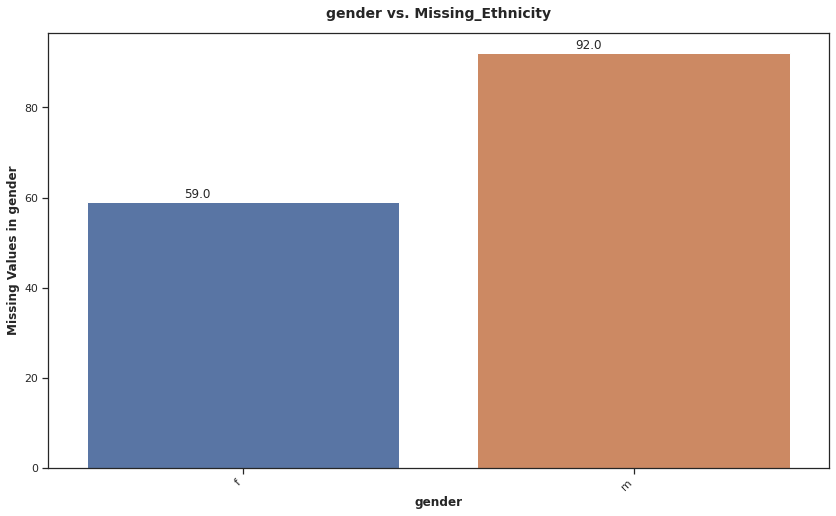

In [152]:
# Gender vs. Missing Ethnicity
df_1 = rows.groupby(['gender']).agg({'Missing_Ethnicity':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'gender', 'Missing_Ethnicity', True)

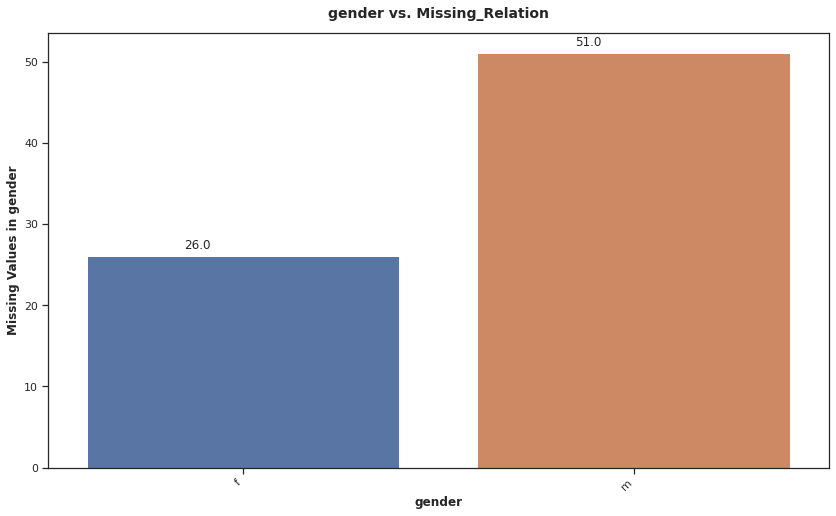

In [156]:
# Gender vs. Missing Relation
df_1 = rows.groupby(['gender']).agg({'Missing_Relation':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'gender', 'Missing_Relation', True)

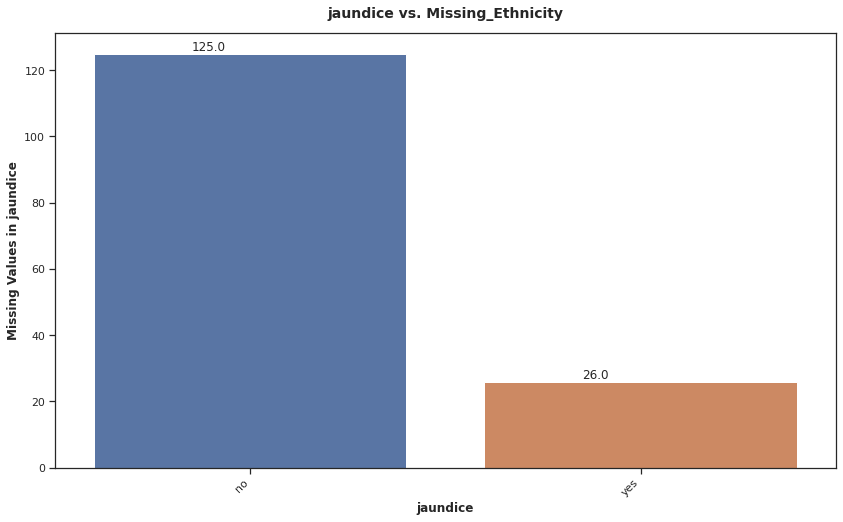

In [153]:
# Jaundice vs. Missing Ethnicity
df_1 = rows.groupby(['jaundice']).agg({'Missing_Ethnicity':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'jaundice', 'Missing_Ethnicity', True)

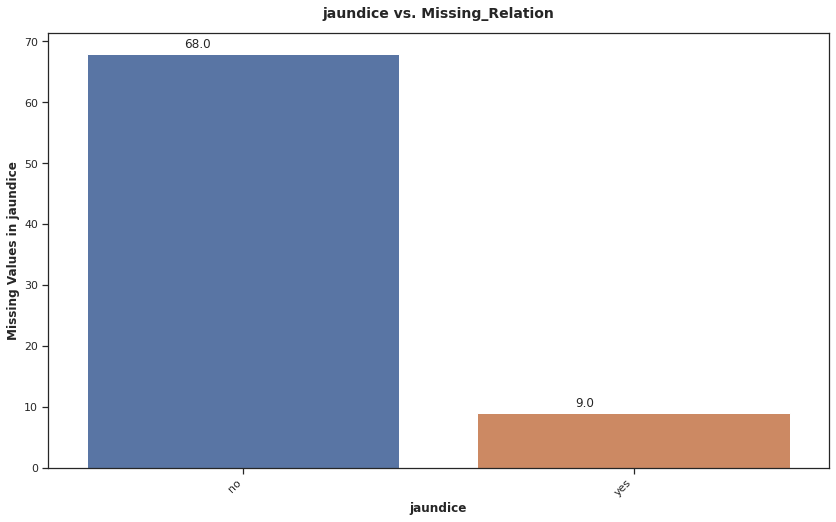

In [157]:
# Jaundice vs. Missing Relation
df_1 = rows.groupby(['jaundice']).agg({'Missing_Relation':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'jaundice', 'Missing_Relation', True)

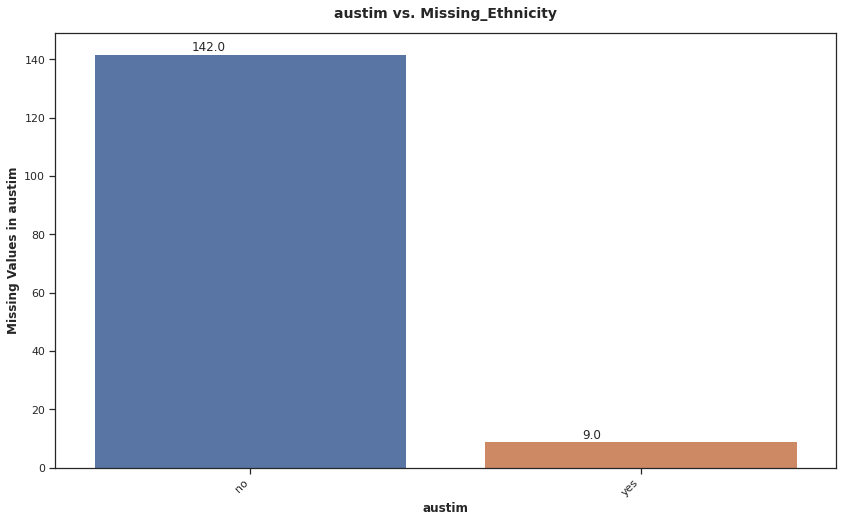

In [154]:
# Autism vs. Missing Ethnicity
df_1 = rows.groupby(['austim']).agg({'Missing_Ethnicity':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'austim', 'Missing_Ethnicity', True)

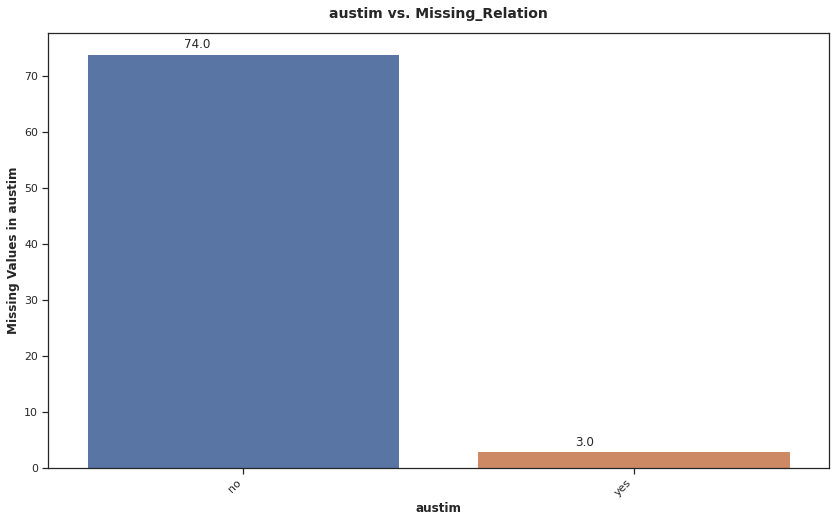

In [158]:
# Autism vs. Missing Relation
df_1 = rows.groupby(['austim']).agg({'Missing_Relation':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'austim', 'Missing_Relation', True)

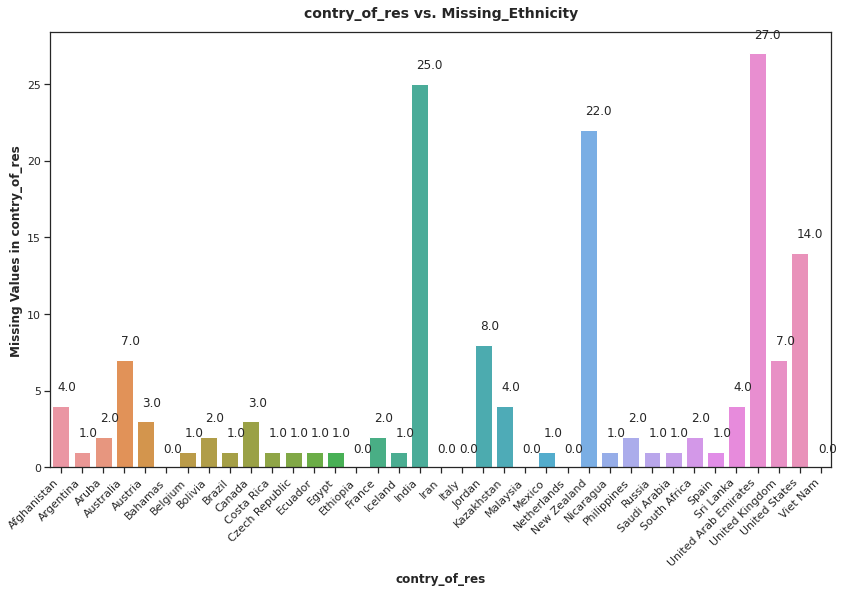

In [140]:
# contry_of_res vs. Missing Ethnicity
df_1 = rows.groupby(['contry_of_res']).agg({'Missing_Ethnicity':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'contry_of_res', 'Missing_Ethnicity', True)

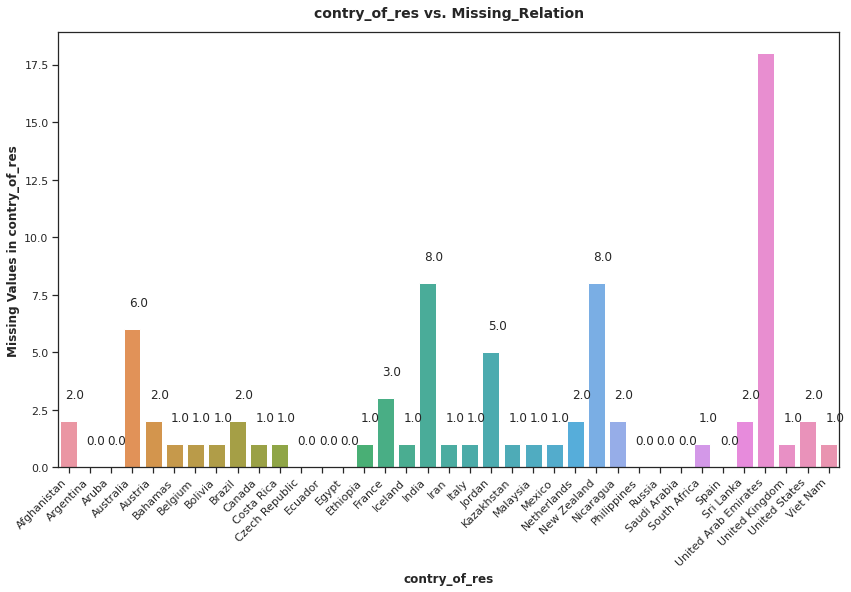

In [159]:
# contry_of_res vs. Missing Relation
df_1 = rows.groupby(['contry_of_res']).agg({'Missing_Relation':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'contry_of_res', 'Missing_Relation', True)

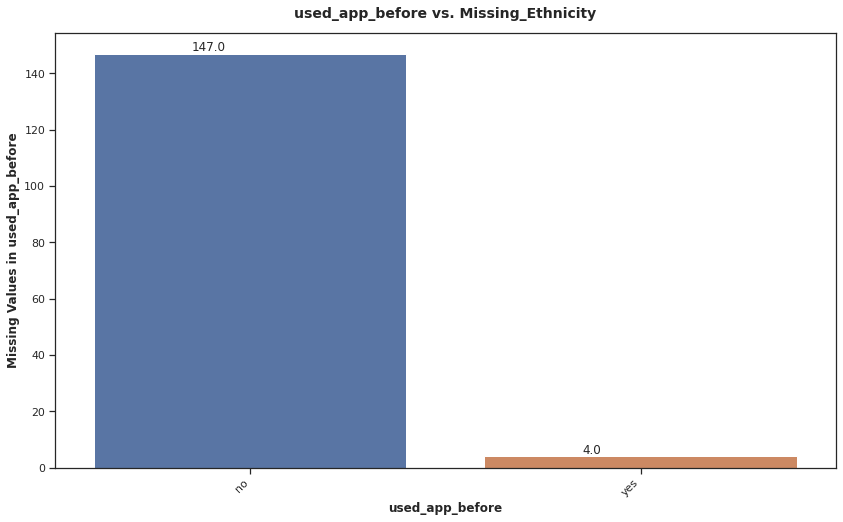

In [141]:
# used_app_before vs. Missing Ethnicity
df_1 = rows.groupby(['used_app_before']).agg({'Missing_Ethnicity':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'used_app_before', 'Missing_Ethnicity', True)

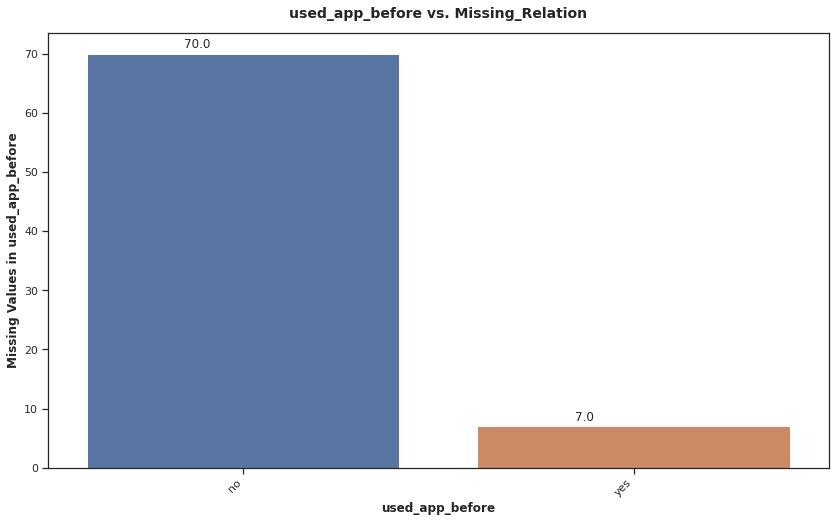

In [160]:
# used_app_before vs. Missing Relation
df_1 = rows.groupby(['used_app_before']).agg({'Missing_Relation':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'used_app_before', 'Missing_Relation', True)

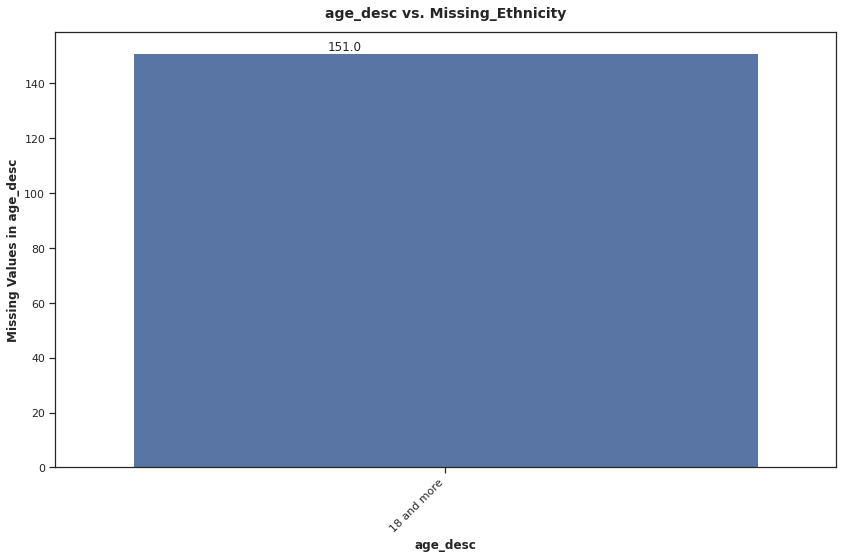

In [142]:
# used_app_before vs. Missing Ethnicity
df_1 = rows.groupby(['age_desc']).agg({'Missing_Ethnicity':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'age_desc', 'Missing_Ethnicity', True)

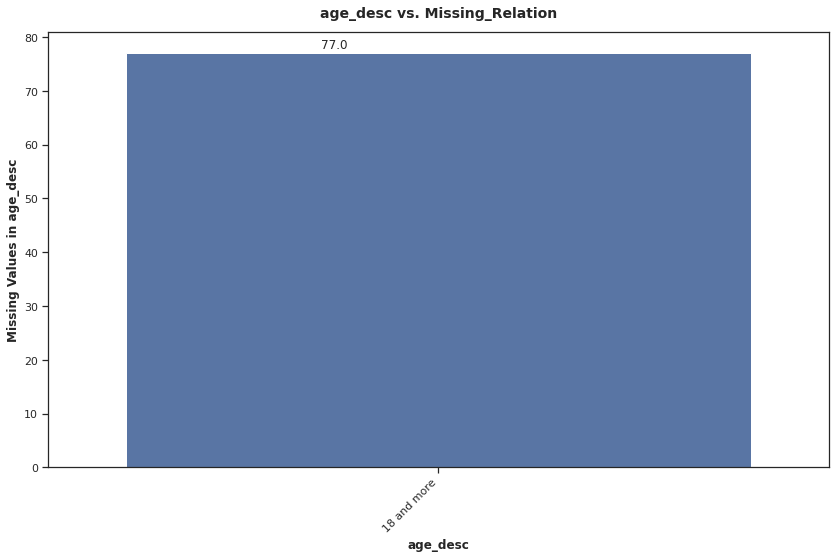

In [161]:
# used_app_before vs. Missing Relation
df_1 = rows.groupby(['age_desc']).agg({'Missing_Relation':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'age_desc', 'Missing_Relation', True)

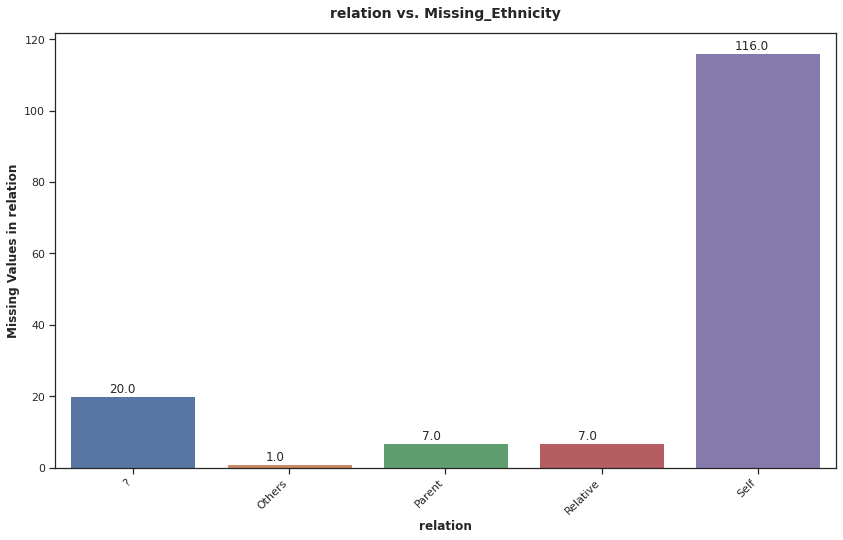

In [143]:
# relation vs. Missing Ethnicity
df_1 = rows.groupby(['relation']).agg({'Missing_Ethnicity':'sum'})
df_1 = df_1.reset_index()
plot_missing_data(df_1, 'relation', 'Missing_Ethnicity', True)

### 7. Replace ? with NaN

In [164]:
df = df.replace('?', np.nan)

In [165]:
instance.missing_data_basic_analysis(df)

Column Analysis:

Columns with null values:
There are 2 columns with null values which is 9.0 percent of the features

Columns with NaNs:
relation      9.62
ethnicity    18.88
dtype: float64

Columns with NaNs greater than 30%:
Series([], dtype: float64)

Number of columns to be dropped:
0 needs to be dropped, that is, 0.0 % of total features

Descriptive analysis of columns with missing values
count     2.000000
mean     14.250000
std       6.547809
min       9.620000
25%      11.935000
50%      14.250000
75%      16.565000
max      18.880000
dtype: float64

Row Analysis:

The number of rows with all NaN values are: 0


Time taken to run this procedure: 0.99 seconds


In [166]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

### 8 - Display cardinality of categorical columns

In [167]:
instance.display_cardinality(df)

ID                 800
A1_Score             2
A2_Score             2
A3_Score             2
A4_Score             2
A5_Score             2
A6_Score             2
A7_Score             2
A8_Score             2
A9_Score             2
A10_Score            2
age                800
gender               2
ethnicity           11
jaundice             2
austim               2
contry_of_res       61
used_app_before      2
result             800
age_desc             1
relation             5
Class/ASD            2
dtype: int64


Time taken to run this procedure: 0.01 seconds


In [169]:
instance.display_cardinality(df_test)

ID                 200
A1_Score             2
A2_Score             2
A3_Score             2
A4_Score             2
A5_Score             2
A6_Score             2
A7_Score             2
A8_Score             2
A9_Score             2
A10_Score            2
age                200
gender               2
ethnicity           12
jaundice             2
austim               2
contry_of_res       44
used_app_before      2
result             200
age_desc             1
relation             6
dtype: int64


Time taken to run this procedure: 0.01 seconds


### 9. Check if values are positive

In [207]:
instance.check_positive(df, 'A1_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [208]:
instance.check_positive(df, 'A2_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [209]:
instance.check_positive(df, 'A3_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [210]:
instance.check_positive(df, 'A4_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [211]:
instance.check_positive(df, 'A5_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [212]:
instance.check_positive(df, 'A6_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [213]:
instance.check_positive(df, 'A7_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [214]:
instance.check_positive(df, 'A8_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [215]:
instance.check_positive(df, 'A9_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [216]:
instance.check_positive(df, 'A10_Score')

[ True]


Time taken to run this procedure: 0.0 seconds


In [181]:
instance.check_positive(df, 'age')

[ True]


Time taken to run this procedure: 0.0 seconds


In [182]:
instance.check_positive(df, 'result')

[ True False]


Time taken to run this procedure: 0.0 seconds


In [183]:
instance.check_positive(df, 'Class/ASD')

[False  True]


Time taken to run this procedure: 0.0 seconds


### 10 - Check column values

In [186]:
converted_df = instance.convert_columns_string(df)



Time taken to run this procedure: 0.02 seconds


In [189]:
column_list = converted_df.columns
instance.check_column_values(converted_df, column_list)



Check if all characters in the string are whitespaces. True if space exists, else False.
Column name: ID
[False]
Column name: A1_Score
[False]
Column name: A2_Score
[False]
Column name: A3_Score
[False]
Column name: A4_Score
[False]
Column name: A5_Score
[False]
Column name: A6_Score
[False]
Column name: A7_Score
[False]
Column name: A8_Score
[False]
Column name: A9_Score
[False]
Column name: A10_Score
[False]
Column name: age
[False]
Column name: gender
[False]
Column name: ethnicity
[False]
Column name: jaundice
[False]
Column name: austim
[False]
Column name: contry_of_res
[False]
Column name: used_app_before
[False]
Column name: result
[False]
Column name: age_desc
[False]
Column name: relation
[False]
Column name: Class/ASD
[False]


Check whether all characters are numeric. True if only numeric, else False.
Column name: ID
[ True]
Column name: A1_Score
[ True]
Column name: A2_Score
[ True]
Column name: A3_Score
[ True]
Column name: A4_Score
[ True]
Column name: A5_Score
[ True]

### 11. Check Quantitative Frequencies



Proportion Values:
  Unique Values  Percentage
0             f       0.519
1             m       0.481




Time taken to run this procedure: 0.04 seconds


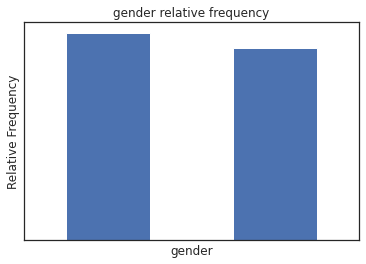

In [191]:
instance.barchart(df, 'gender', 'rel')



Proportion Values:
      Unique Values  Percentage
0    White-European       0.264
1               nan       0.189
2             Asian       0.168
3   Middle Eastern        0.145
4             Black       0.056
5            Latino       0.055
6       South Asian       0.044
7            Others       0.030
8          Pasifika       0.022
9          Hispanic       0.020
10          Turkish       0.005
11           others       0.002




Time taken to run this procedure: 0.14 seconds


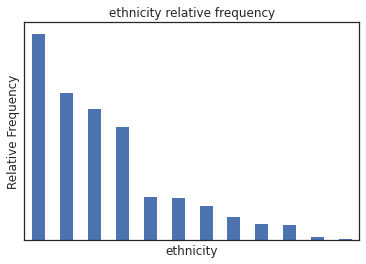

In [192]:
instance.barchart(df, 'ethnicity', 'rel')



Proportion Values:
  Unique Values  Percentage
0            no       0.755
1           yes       0.245




Time taken to run this procedure: 0.04 seconds


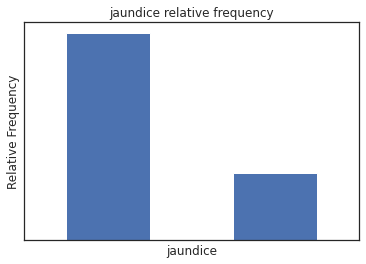

In [193]:
instance.barchart(df, 'jaundice', 'rel')



Proportion Values:
  Unique Values  Percentage
0            no       0.854
1           yes       0.146




Time taken to run this procedure: 0.04 seconds


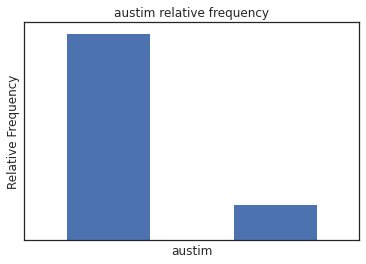

In [194]:
instance.barchart(df, 'austim', 'rel')



Proportion Values:
           Unique Values  Percentage
0          United States       0.185
1   United Arab Emirates       0.118
2            New Zealand       0.116
3                  India       0.092
4         United Kingdom       0.072
..                   ...         ...
56             Indonesia       0.001
57                 Tonga       0.001
58                  Iraq       0.001
59               Finland       0.001
60                 Niger       0.001

[61 rows x 2 columns]




Time taken to run this procedure: 0.24 seconds


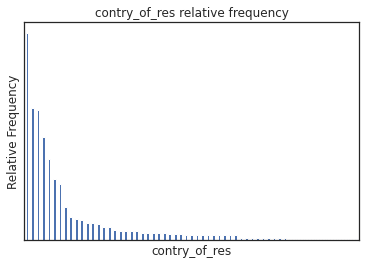

In [195]:
instance.barchart(df, 'contry_of_res', 'rel')



Proportion Values:
  Unique Values  Percentage
0            no       0.956
1           yes       0.044




Time taken to run this procedure: 0.04 seconds


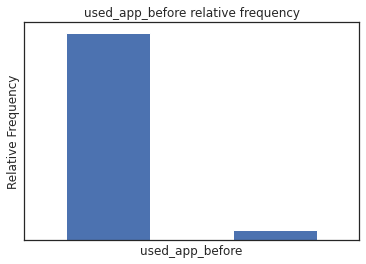

In [196]:
instance.barchart(df, 'used_app_before', 'rel')



Proportion Values:
  Unique Values  Percentage
0   18 and more         1.0




Time taken to run this procedure: 0.04 seconds


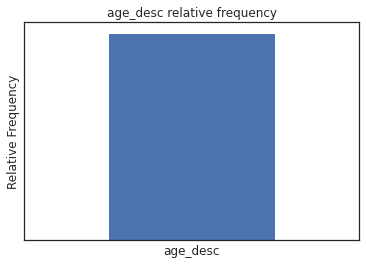

In [197]:
instance.barchart(df, 'age_desc', 'rel')



Proportion Values:
              Unique Values  Percentage
0                      Self       0.771
1                       nan       0.096
2                    Parent       0.061
3                  Relative       0.054
4  Health care professional       0.009
5                    Others       0.009




Time taken to run this procedure: 0.04 seconds


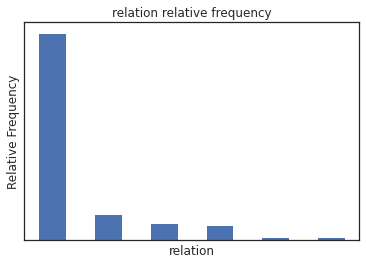

In [198]:
instance.barchart(df, 'relation', 'rel')



Proportion Values:
   Unique Values  Percentage
0              0       0.769
1              1       0.231




Time taken to run this procedure: 0.03 seconds


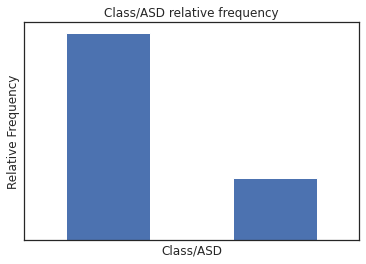

In [199]:
instance.barchart(df, 'Class/ASD', 'rel')

### 12. Histograms of Numeric Features

1 - Age

In [217]:
instance.bin_num_range_selector(df, 'age')

Maximum: 72.40248841
Minimum: 9.560504591


Time taken to run this procedure: 0.01 seconds


In [219]:
upper = 72.40248841 + 1
lower = 9.560504591 - 1

instance.bin_num_helper(upper, lower)

Bin size suggestions: []

Or any bin size from the range 1 to 20


Time taken to run this procedure: 0.0 seconds


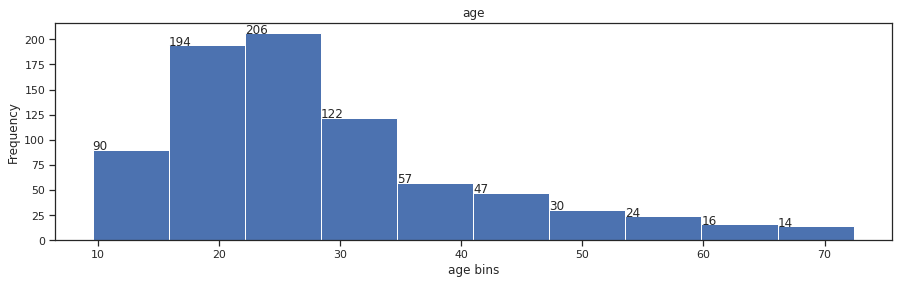



Time taken to run this procedure: 0.28 seconds


In [222]:
instance.make_histogram(df, 'age', 10)

2 - Result

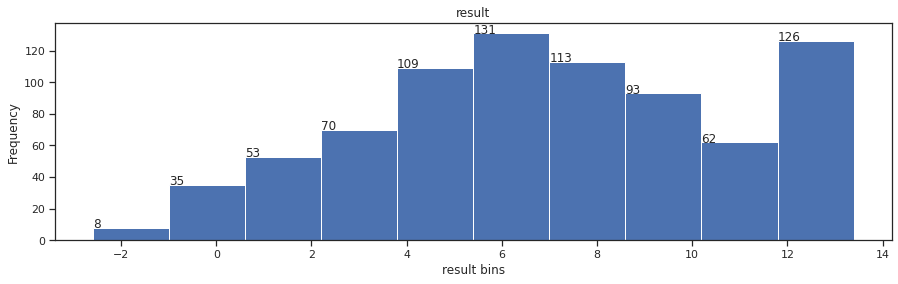



Time taken to run this procedure: 0.17 seconds


In [223]:
instance.make_histogram(df, 'result', 10)

### 13 - Descriptive Analysis of Numerical Features

In [224]:
instance.numeric_feature_details(df)

Number of numeric columns: 14
['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']


Column Name: ID
count    800.0000
mean     400.5000
std      231.0844
min        1.0000
25%      200.7500
50%      400.5000
75%      600.2500
max      800.0000
Name: ID, dtype: float64


median: 400.5
mode: 0        1
1        2
2        3
3        4
4        5
      ... 
795    796
796    797
797    798
798    799
799    800
Length: 800, dtype: int64


Column Name: A1_Score
count    800.000000
mean       0.582500
std        0.493455
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A1_Score, dtype: float64


median: 1.0
mode: 0    1
dtype: int64


Column Name: A2_Score
count    800.00000
mean       0.28625
std        0.45229
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: A2_Score, dtype: fl

## 14 - Find outliers

1 - Age

In [230]:
instance.print_outlier_values(df, 'age')

Higher outliers: 53.963765945
Lower outliers: -1.5269289549999954


Time taken to run this procedure: 0.0 seconds


In [225]:
higher_df, lower_df = instance.get_outlier_dfs(df, 'age')



Time taken to run this procedure: 0.0 seconds


In [231]:
higher_df.shape

(51, 22)

2 - result

In [229]:
instance.print_outlier_values(df, 'result')

Higher outliers: 17.941118566625
Lower outliers: -3.520581798375


Time taken to run this procedure: 0.0 seconds
